In [1]:
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs
import pandas as pd
import numpy as np
from shapely import wkt
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
era1 = pd.read_csv('../data/era1.csv')    #read a csv file
era1.head()
crs = {'init': 'epsg:3395'}
gdf = gpd.GeoDataFrame(era1, crs=crs)
boroughs = gpd.read_file(geoplot.datasets.get_path('nyc_boroughs'))
gdf['geometry'] = gpd.points_from_xy(gdf['x'], gdf['y'], crs="EPSG:4326")

c:\Users\chadd\anaconda\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\chadd\AppData\Local\Temp\ipykernel_22892\3473317356.py:4: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf = gpd.GeoDataFrame(era1, crs=crs)


In [3]:
boroughs

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330385.03697,1.623853e+09,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,4,Queens,861038.47930,3.049947e+09,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ..."
2,3,Brooklyn,726568.94634,1.959432e+09,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,1,Manhattan,358532.95642,6.364422e+08,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,2,Bronx,464517.89055,1.186804e+09,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."


In [4]:
era1.head()

,bct2020,bldgarea_total,resarea_total,comarea_total,x,y,geometry
0,2017300,110483,80010.0,15580.0,-73.916189,40.826998,POINT (-73.91619 40.82700)
1,2040100,18515,14865.0,3650.0,-73.896691,40.866216,POINT (-73.89669 40.86622)
2,3028700,347077,140441.0,153820.0,-73.935400,40.695509,POINT (-73.93540 40.69551)
3,3019400,45247,21672.0,22000.0,-74.001265,40.625737,POINT (-74.00127 40.62574)
4,3044902,267090,0.0,271250.0,-73.930405,40.713250,POINT (-73.93041 40.71325)


In [5]:
gdf.loc[gdf['resarea_total'] > 800000, 'resarea_total'] = 800000
gdf.loc[gdf['comarea_total'] > 800000, 'comarea_total'] = 800000
gdf_new = gdf.drop(columns=['x', 'y'])

c:\Users\chadd\anaconda\envs\geo_env\lib\site-packages\geoplot\geoplot.py:56: UserWarning: The data being passed to "hue" includes null values. You probably want to remove these before plotting this data with geoplot.
  warnings.warn(
c:\Users\chadd\anaconda\envs\geo_env\lib\site-packages\geoplot\geoplot.py:56: UserWarning: The data being passed to "hue" includes null values. You probably want to remove these before plotting this data with geoplot.
  warnings.warn(


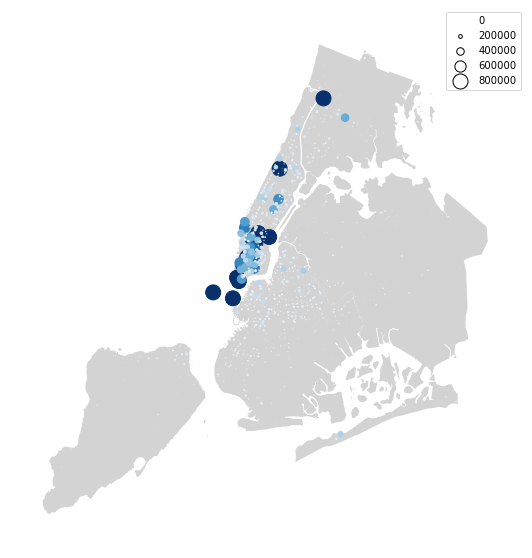

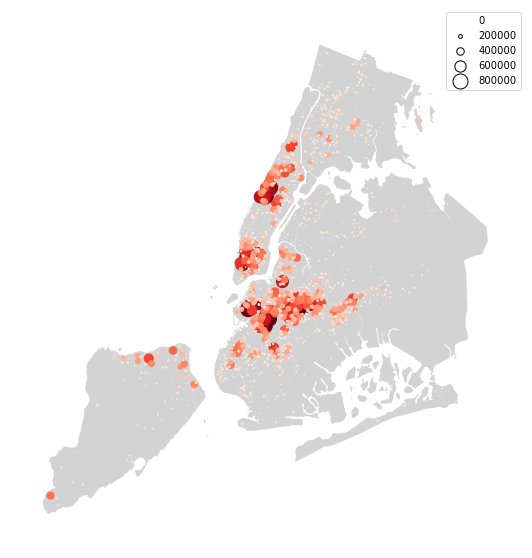

In [6]:
ax = geoplot.polyplot(
    boroughs, projection=gcrs.AlbersEqualArea(),
    edgecolor='None', facecolor='lightgray', figsize=(15, 10)
)
plt1 = geoplot.pointplot(gdf_new,
                  scale='comarea_total',
                  hue = 'comarea_total',
                  cmap='Blues',
                  legend=True,
                  legend_var="scale",
                  limits=(0, 15),
                  projection=gcrs.WebMercator(),
                  ax=ax,
                
                 )

plt1.get_figure().savefig("era1_com.pdf")

ax2 = geoplot.polyplot(
    boroughs, projection=gcrs.AlbersEqualArea(),
    edgecolor='None', facecolor='lightgray', figsize=(15, 10)
)
plt2 = geoplot.pointplot(gdf_new,
                  scale='resarea_total',
                  hue = 'resarea_total',
                  cmap='Reds',
                  legend=True,
                  legend_var="scale",
                  limits=(0, 15),
                  projection=gcrs.WebMercator(),
                  ax=ax2
                 )

plt2.get_figure().savefig("era1_res.pdf")

In [5]:
# plt = geoplot.choropleth(
#     gdf, hue='resarea_total', figsize=(15, 10), cmap='Reds',  
#     legend=True, edgecolor='white', linewidth=0.1,
#     projection=gcrs.WebMercator())

# plt.get_figure().savefig("era1_res.pdf")
# plt = geoplot.choropleth(
#     gdf, hue='comarea_total', figsize=(15, 10), cmap='Blues',  
#     legend=True, edgecolor='white', linewidth=0.1,
#     projection=gcrs.WebMercator())

# plt.get_figure().savefig("era1_com.pdf")